In [56]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='2'

import tensorflow as tf

from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np




(x_train,y_train), (x_test,y_test) =keras.datasets.mnist.load_data()
x_train=x_train/255
x_test=x_test/255
print(len(x_train))
print(len(x_test))
x_train[0]

60000
10000


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

0


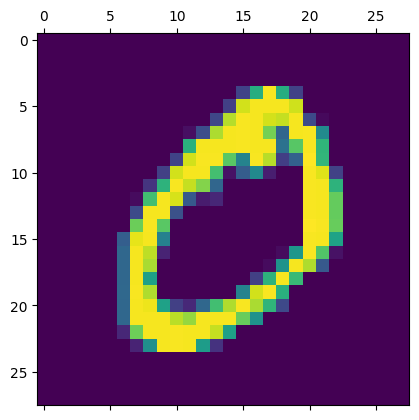

In [59]:
plt.matshow(x_train[1])
print(y_train[1])

In [61]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [23]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 9.7042 - accuracy: 0.8409
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 6.0889 - accuracy: 0.8784
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 5.7107 - accuracy: 0.8825
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 5.5727 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 5.2911 - accuracy: 0.8866
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 5.4390 - accuracy: 0.8870
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 5.2113 - accuracy: 0.8896
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 5.2926 - accuracy: 0.8891
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 5.2121 - accuracy: 0.8902
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 5.210

In [26]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 6.0120 - accuracy: 0.8869


[6.011996269226074, 0.886900007724762]

313/313 [==============================] - 0s 1ms/step
[1.5413564e-08 0.0000000e+00 2.5811736e-11 1.2735150e-12 1.0000000e+00
 4.3093944e-28 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00]
4


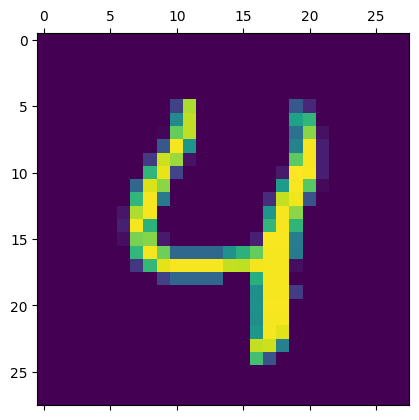

In [48]:
plt.matshow(x_test[4])
y_predicted=model.predict(x_test_flattened)
print(y_predicted[4])
print(np.argmax(y_predicted[4]))

In [52]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels[:10])
print(y_test[:10])

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

[3, 0, 1, 0, 4, 1, 4, 1, 0, 4]
[7 2 1 0 4 1 4 9 5 9]


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    2,    0,    2,    1,    0,    0,    0,    0],
       [   8, 1125,    2,    0,    0,    0,    0,    0,    0,    0],
       [ 259,  419,  349,    3,    2,    0,    0,    0,    0,    0],
       [ 123,  312,  436,  137,    0,    1,    1,    0,    0,    0],
       [  69,  204,  118,  229,  362,    0,    0,    0,    0,    0],
       [ 243,  111,  171,  204,   49,  112,    2,    0,    0,    0],
       [ 177,  189,  579,    9,    3,    0,    1,    0,    0,    0],
       [  66,  202,  205,  484,   38,   21,    0,   12,    0,    0],
       [ 164,  431,  291,   45,   16,   26,    0,    1,    0,    0],
       [  45,  233,  129,  519,   81,    1,    0,    1,    0,    0]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

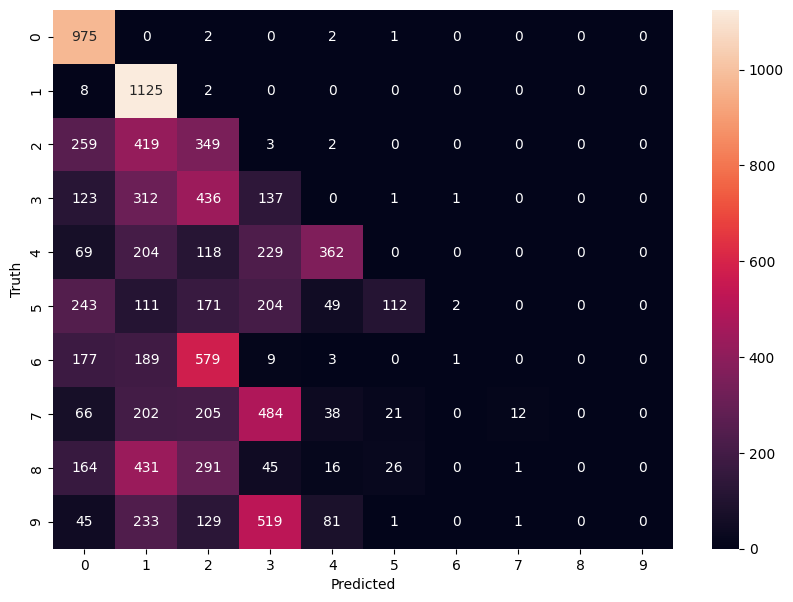

In [55]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.
